Opencv, imgaug ve albumentations hepsi opencv veya numpy üzerinden işlem yapmaktadır.
GPU için Numba kullanılabilir fakat numba tüm fonksiyonları tanımıyor.
Ayrıca GPU üzerinde, Pytorch dışından farklı bir konuma yerleştirdiğinden
GPU hafızası gereksiz işgal edilmektedir.

Kornia kütüphanesi çok kullanılan görüntü işleme fonksiyonlarını
Pytorch ile tekrar oluşturmuştur.
Bu sayede Pytorch jit özelliğinden yararlanılabilmekte ve
tüm pipeline GPU ile hesaplanabilmektedir.

Augmentasyon işlemi Jit sırasında yapay sinir ağına eklenebildiğinden yazılımı verdiğiniz ortam için
ayrıca augmentasyon fonksiyonlarını yazmanıza gerek kalmamaktadır.

Kornia 08/09/2020 tarihi itibariyle 0.3.1 versiyondadır ve hâlâ geliştirme aşamasındadır.

In [1]:
import torch
import kornia

import cv2
import numpy as np

from matplotlib import pyplot as plt

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


H: height
W: width
C: channel
B: batch

Open cv'nin Numpy gösterimi. Opencv bgr(blue, green, red) şeklinde okur.

In [16]:
img_bgr = cv2.imread("../KendiResmim.jpg")  # HxWxC
print(img_bgr.shape)


(1198, 1198, 3)


Kornia 4D torch tensor

In [18]:
x_bgr = kornia.image_to_tensor(img_bgr)  # 1xCxHxW
print(x_bgr.shape)


torch.Size([1, 3, 1198, 1198])


In [ ]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)  #BxCxHxW
print(x_bgr.shape)


bgr -> rgb renk dönüşümü

In [4]:
x_rgb = kornia.bgr_to_rgb(x_bgr)  # 1xCxHxW
print(x_rgb.shape)


Pytorch tensor -> Numpy image.

In [5]:
img_rgb = kornia.tensor_to_image(x_rgb)
print(img_rgb.shape)


Resmi görelim.

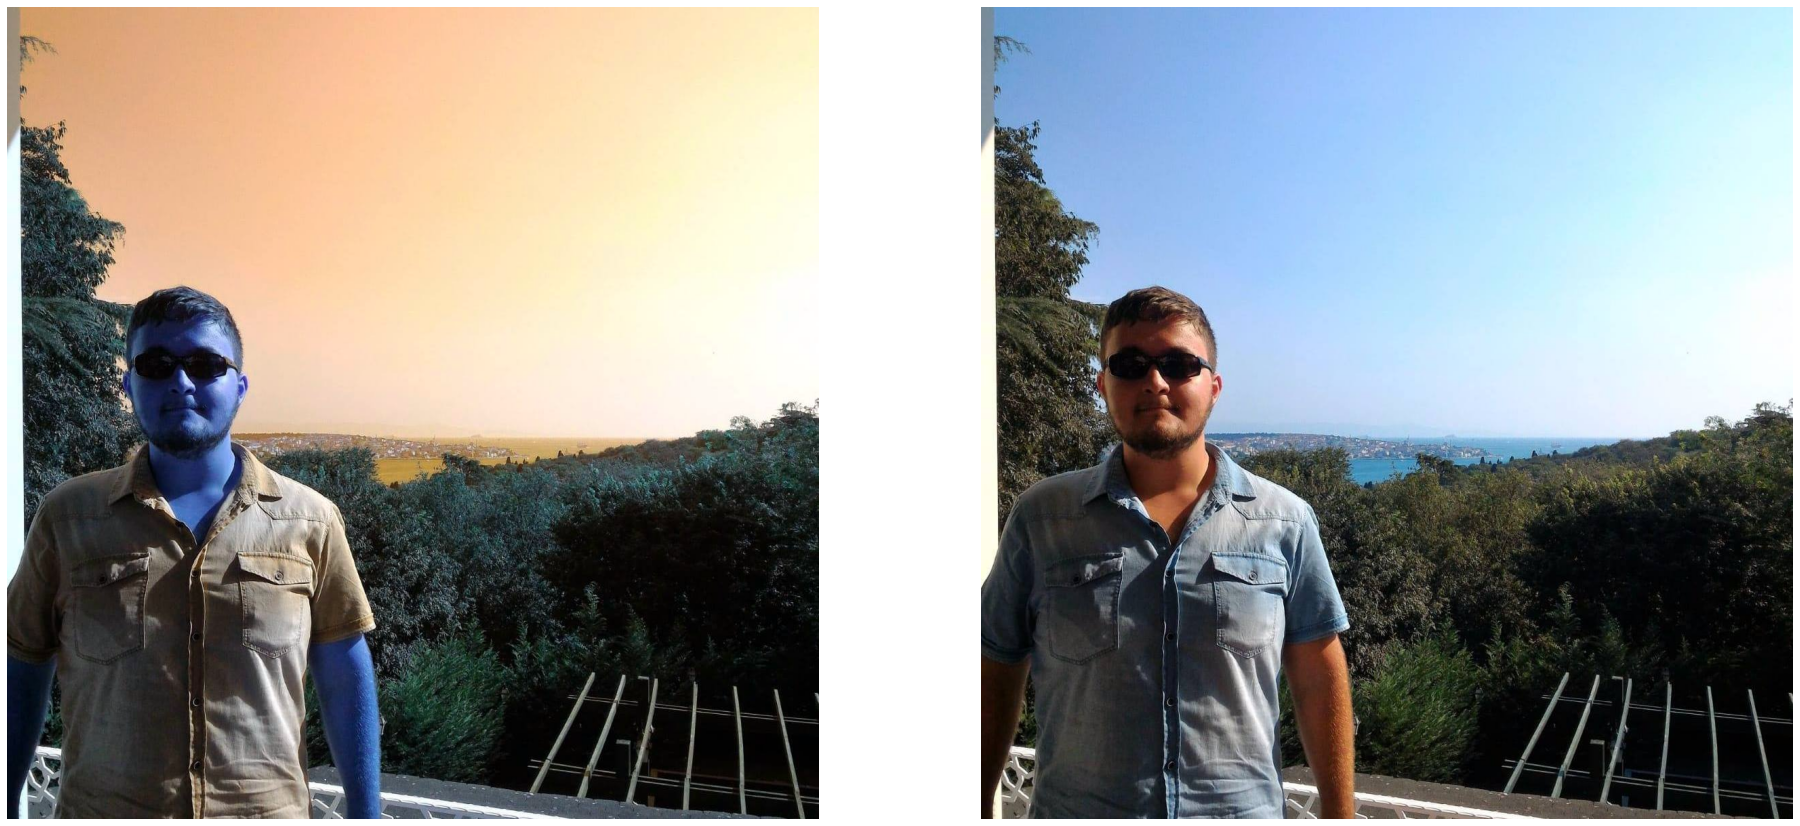

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()  # satırda görünsün.

# bgr(blue, green, red)
axs[0].axis('off')
axs[0].imshow(img_bgr)

# rgb(red, green, blue)
axs[1].axis('off')
axs[1].imshow(img_rgb)

## Gauss Blur

In [21]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)  # BxCxHxW
data = kornia.bgr_to_rgb(x_bgr)
# kernel
# kernel_size (Tuple[int, int]): kernel size. -> (11, 11)
# sigma (Tuple[float, float]): kernel standard deviation. -> (10.5, 10.5)
gauss = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))  # kernel boyutu, gauss sigma katsayısı
# process
x_blur = gauss(data.float())
img_blur = kornia.tensor_to_image(x_blur.byte())  # float -> byte. matplotlib can show image


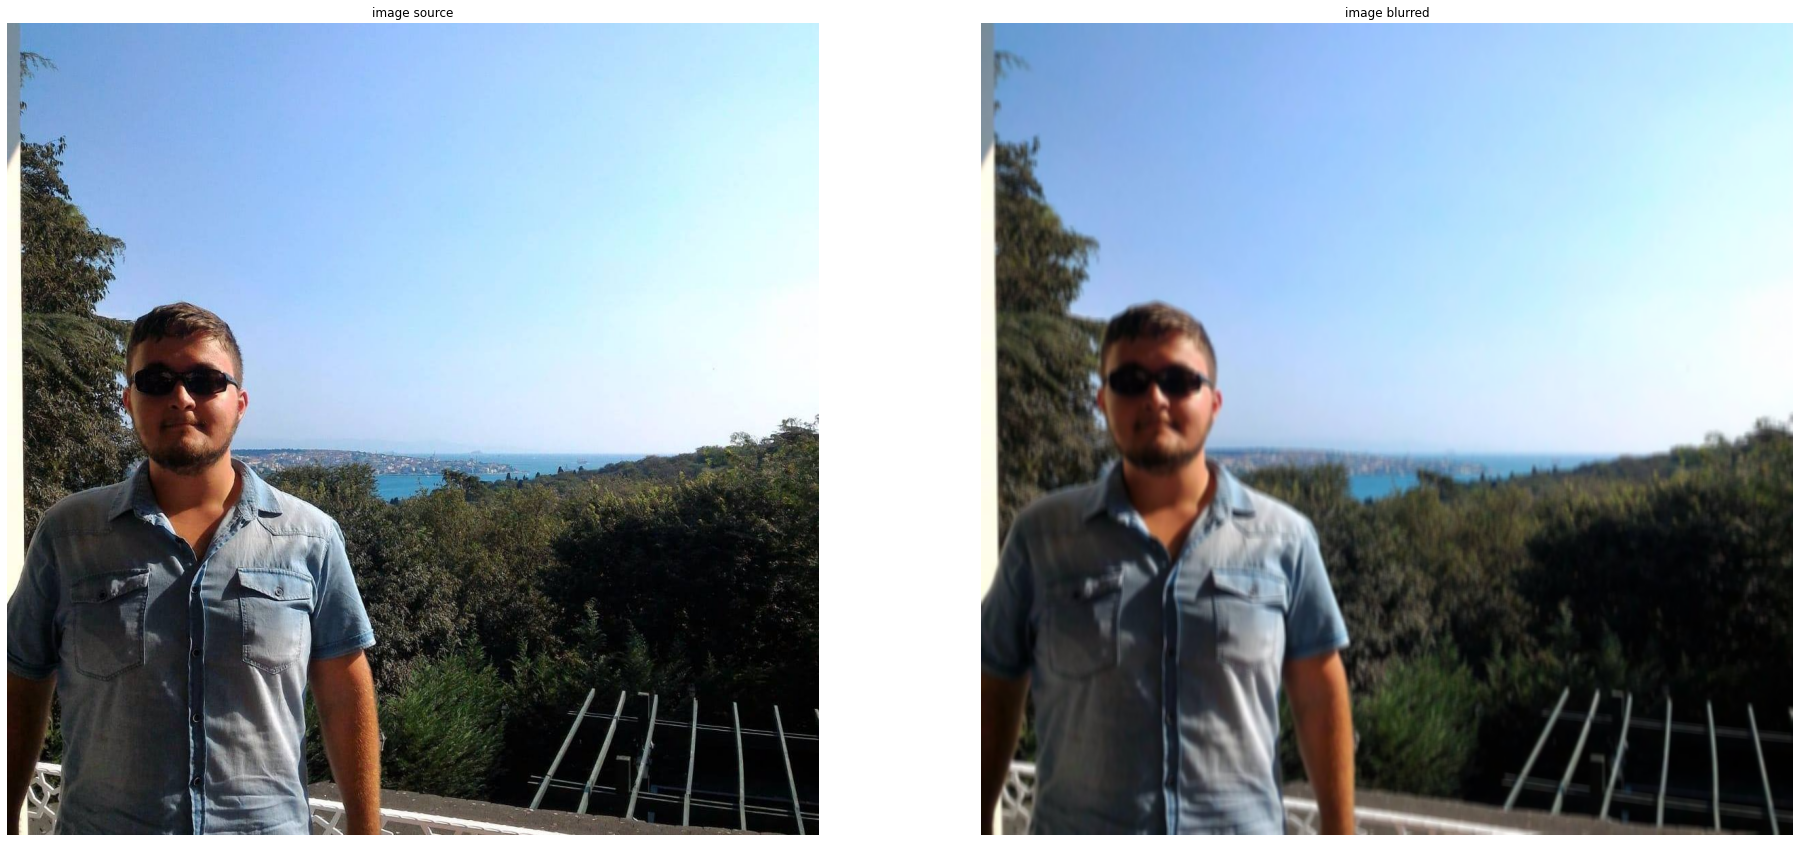

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()


axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].set_title('image blurred')
axs[1].imshow(img_blur)